<a href="https://colab.research.google.com/github/Jay5852/100-days-machine-learning-daily-practice/blob/main/missing_value_handling/numerical_imputation_mean_median.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.describe()

,Age,Fare,Family,Survived
count,714.000000,846.000000,891.000000,891.000000
mean,29.699118,32.279338,0.904602,0.383838
std,14.526497,50.305796,1.613459,0.486592
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.206250,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000


In [7]:
df.isnull().sum()

,0
Age,177
Fare,45
Family,0
Survived,0


In [10]:
df.isnull().mean() *100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


In [12]:
# Always we do train test split first
X = df.drop(columns=['Survived'])
y = df['Survived']

In [13]:
X.shape,y.shape

((891, 3), (891,))

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 42)

In [15]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [16]:
X_train.isnull().mean()

,0
Age,0.196629
Fare,0.050562
Family,0.000000


In [17]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [18]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [20]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
150,51.0,12.525,0,51.0,51.0,12.525,12.525
506,33.0,26.000,2,33.0,33.0,26.000,26.000
637,31.0,26.250,2,31.0,31.0,26.250,26.250
406,51.0,7.750,0,51.0,51.0,7.750,7.750
647,56.0,35.500,0,56.0,56.0,35.500,35.500


In [22]:
X_train.isnull().sum()

,0
Age,140
Fare,36
Family,0
Age_mean,0
Age_median,0
Fare_mean,0
Fare_median,0


# Always check for the variance when we use fiilna() using pandas

In [23]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  210.2517072477438
Age Variance after median imputation:  169.20731007048096
Age Variance after mean imputation:  168.8519336687225
Original Fare variable variance:  2761.031434948639
Fare Variance after median imputation:  2637.01248167777
Fare Variance after mean imputation:  2621.2323749512393


# Also Check the distribution of the data



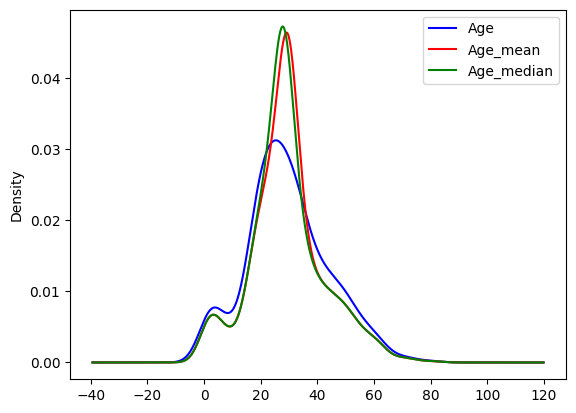

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Distribution with missing values
X_train['Age'].plot(kind='kde',ax= ax, color='blue')

# Distribution after filling missing values with mean
X_train['Age_mean'].plot(kind='kde',ax= ax, color='red')

# Distribution after filling missing values with meadian
X_train['Age_median'].plot(kind='kde',ax= ax, color='green')

#legends

lines, labels =ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

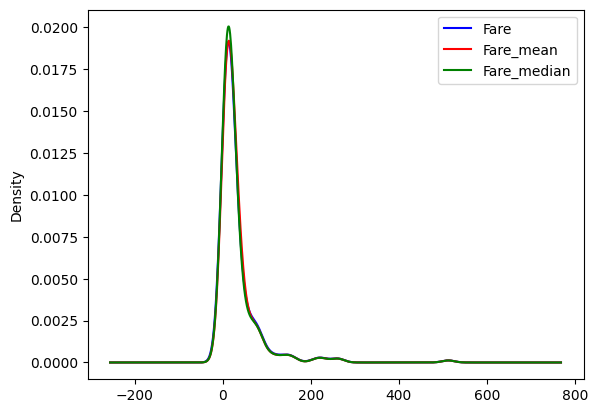

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Distribution with missing values
X_train['Fare'].plot(kind='kde',ax= ax, color='blue')

# Distribution after filling missing values with mean
X_train['Fare_mean'].plot(kind='kde',ax= ax, color='red')

# Distribution after filling missing values with meadian
X_train['Fare_median'].plot(kind='kde',ax= ax, color='green')

#legends

lines, labels =ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [32]:
# Also check for the covariance and correlation
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [33]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
Fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
Fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


<Axes: >

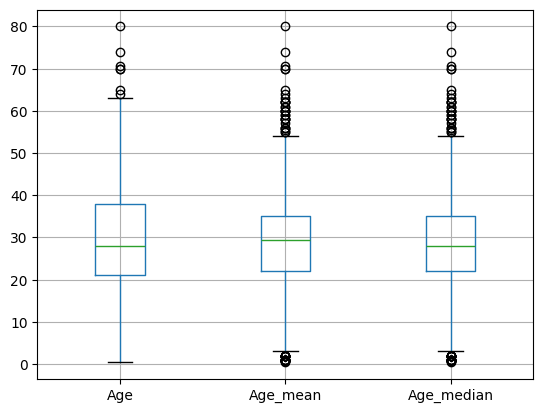

In [34]:
# Effect of outliers(Age)
# using boxplot we can see the outliers are increased in case of Age

X_train[['Age','Age_mean','Age_median']].boxplot()

<Axes: >

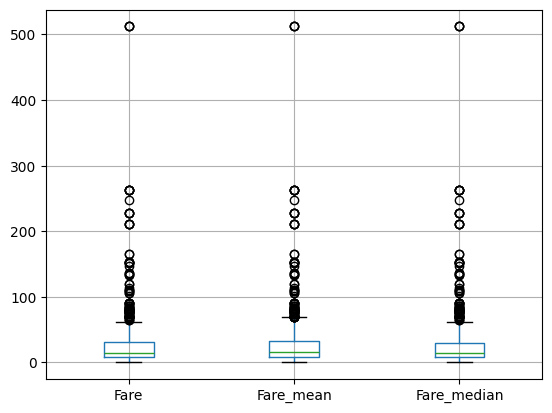

In [35]:
# Effect of outliers(Fare)
# using boxplot we can see the outliers are increased in case of Age

X_train[['Fare','Fare_mean','Fare_median']].boxplot()

# Using Sklearn

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size =0.2,
                                                 random_state = 42)

In [38]:
X_train.head()

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6


In [48]:
imputer1 = SimpleImputer(strategy='median')
imputer2= SimpleImputer(strategy='mean')

In [49]:
trf1 = ColumnTransformer([
    ('imputer1',imputer1,[0]),
    ('imputer2',imputer2,[1])
],remainder='passthrough')

In [56]:
trf1.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 [0]),
                                ('imputer2', SimpleImputer(), [1])])

In [51]:
trf1.named_transformers_['imputer1'].statistics_


array([28.])

In [52]:
trf1.named_transformers_['imputer2'].statistics_

array([32.51778772])

In [53]:
X_train = trf1.transform(X_train)
X_test = trf1.transform(X_test)

In [57]:
X_train

array([[ 45.5       ,  28.5       ,   0.        ],
       [ 23.        ,  13.        ,   0.        ],
       [ 32.        ,   7.925     ,   0.        ],
       ...,
       [ 41.        ,  32.51778772,   2.        ],
       [ 14.        , 120.        ,   3.        ],
       [ 21.        ,  77.2875    ,   1.        ]])